#**I. Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install squarify

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [ ]:
org_report = pd.read_excel('/content/drive/MyDrive/ecommerce_retail.xlsx')

#**II. EDA**

In [ ]:
org_report.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
org_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
org_report.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
report_1 = org_report[(org_report['Country'] == 'United Kingdom') & (org_report['Quantity'] > 0) & (org_report['UnitPrice'] > 0)]

In [ ]:
report_1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,130802
Country,0


In [ ]:
report_1 = report_1.dropna(subset=['CustomerID'])
report_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [ ]:
report_1['CustomerID'] = report_1['CustomerID'].astype(int)

<ipython-input-43-b951170f17c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_1['CustomerID'] = report_1['CustomerID'].astype(int)


In [ ]:
report_1.nunique()

,0
InvoiceNo,16646
StockCode,3645
Description,3844
Quantity,293
InvoiceDate,15612
UnitPrice,402
CustomerID,3920
Country,1


Conclusion:
- Missing Data:
  - 130802 rows in CustomerID
> **Next Step: Remove Missing Data**
- Duplicates:
  - No primal key found
> **Next Step: No Action**
- Incorrect Data Type:
  - Customer ID: float64 -> int64
> **Next Step: Change Data Type**
- Incorrect Value:
  - Negative values in Quantity
  - Negative values in UnitPrice
  - United Kingdom contributes mostly of the data
> **Next Step: Remove Negative Values & Filter Data From UK Only**

#**III. RFM Calculation**

In [ ]:
report_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


##1. R-Calculation

In [ ]:
report_1['DaySincePurchase'] = (pd.to_datetime('2011-12-31') - pd.to_datetime(report_1['InvoiceDate'])).dt.days
R_calc = report_1.groupby('CustomerID').agg({'DaySincePurchase': 'min'})
R_calc['R_score'] = pd.qcut(R_calc['DaySincePurchase'], 5, labels=['5', '4', '3', '2', '1'], duplicates='raise')

## 2. F-Calculation

In [ ]:
F_calc = report_1.groupby('CustomerID').agg({'InvoiceNo': 'nunique'})
F_calc['Rank'] = F_calc['InvoiceNo'].rank(method='first')
F_calc['F_score'] = pd.qcut(F_calc['Rank'], 5, labels=['1', '2', '3', '4', '5'], duplicates='raise')

## 3. M-Calculation

In [ ]:
report_1['Revenue'] = report_1['Quantity'] * report_1['UnitPrice']
M_calc = report_1.groupby('CustomerID').agg({'Revenue': 'sum'})
M_calc['M_score'] = pd.qcut(M_calc['Revenue'], 5, labels=['1', '2', '3', '4', '5'], duplicates='raise')

##4. RFM Calculation & Condition

In [ ]:
RFM_calc_1 = pd.merge(R_calc, F_calc, on='CustomerID', how = 'left')
RFM_calc_2 = pd.merge(RFM_calc_1, M_calc, on='CustomerID', how = 'left')
RFM_calc_2 = RFM_calc_2.drop(columns=['Rank'])
RFM_calc_2 = RFM_calc_2[['DaySincePurchase', 'InvoiceNo', 'Revenue', 'R_score', 'F_score', 'M_score']]
RFM_calc_2 = RFM_calc_2.rename(columns={
        'DaySincePurchase': 'Recency',
        'InvoiceNo': 'Frequency',
        'Revenue': 'Monetary'})

In [ ]:
RFM_calc_2['RFM_score'] = RFM_calc_2['R_score'].astype(str) + RFM_calc_2['F_score'].astype(str) + RFM_calc_2['M_score'].astype(str)
RFM_calc_2['RFM_score'] = RFM_calc_2['RFM_score'].astype(int)

In [ ]:
conditions = [
    RFM_calc_2['RFM_score'].isin([555, 554, 544, 545, 454, 455, 445]),
    RFM_calc_2['RFM_score'].isin([543, 444, 435, 355, 354, 345, 344, 335]),
    RFM_calc_2['RFM_score'].isin([553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]),
    RFM_calc_2['RFM_score'].isin([512, 511, 422, 421, 412, 411, 311]),
    RFM_calc_2['RFM_score'].isin([525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]),
    RFM_calc_2['RFM_score'].isin([535, 534, 443, 434, 343, 334, 325, 324]),
    RFM_calc_2['RFM_score'].isin([331, 321, 312, 221, 213, 231, 241, 251]),
    RFM_calc_2['RFM_score'].isin([255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]),
    RFM_calc_2['RFM_score'].isin([155, 154, 144, 214,215,115, 114, 113]),
    RFM_calc_2['RFM_score'].isin([332, 322, 233, 232, 223, 222, 132, 123, 122, 212, 211]),
    RFM_calc_2['RFM_score'].isin([111, 112, 121, 131,141,151])]
choices = [
    "Champions",
    "Loyal",
    "Potential Loyalist",
    "New Customers",
    "Promising",
    "Need Attention",
    "About To Sleep",
    "At Risk",
    "Cannot Lose Them",
    "Hibernating Customers",
    "Lost Customers"]
RFM_calc_2['CustomerSegment'] = np.select(conditions, choices)
RFM_calc_2.head(10)

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,CustomerSegment
CustomerID,,,,,,,,
12346,346,1,77183.60,1,1,5,115,Cannot Lose Them
12747,23,11,4196.01,5,5,5,555,Champions
12748,21,209,33719.73,5,5,5,555,Champions
12749,24,5,4090.88,5,4,5,545,Champions
12820,24,4,942.34,5,4,4,544,Champions
12821,235,1,92.72,1,1,1,111,Lost Customers
12822,91,2,948.88,3,2,4,324,Need Attention
12823,95,5,1759.50,2,4,4,244,At Risk
12824,80,1,397.12,3,1,2,312,About To Sleep


#**IV. Visualization & Interpretation**

## 1. Distribution of Recency, Frequency & Monetary

### 1.1. Recency

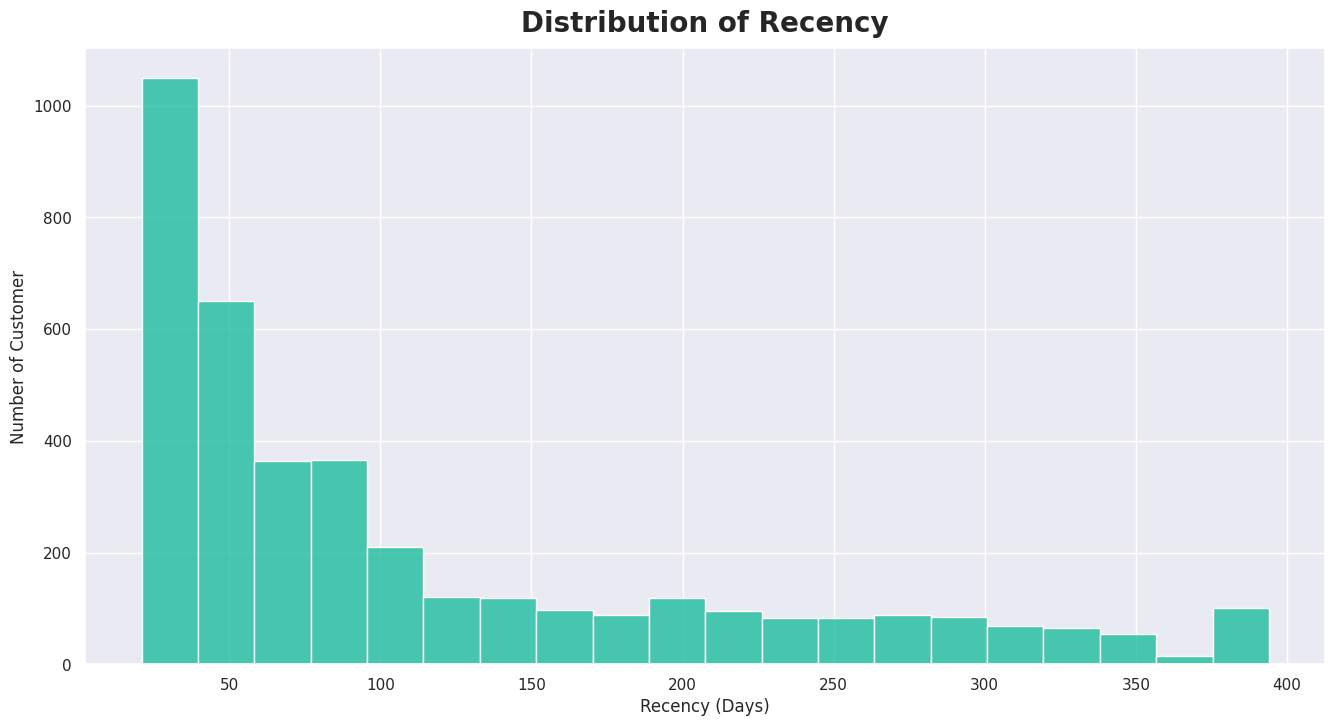

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(16, 8))
sns.histplot(RFM_calc_2['Recency'], bins=20, color='#0fbb98')
plt.title('Distribution of Recency', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('Recency (Days)')
plt.ylabel('Number of Customer')
plt.show()

**Interpretation:**
- The distribution of Recency is right-skewed. As the Recency increases, there is a steep decline in the number of customers.
- The histogram indicates that most customers have made recent purchases (<=100 days). About 1,700 customers have already bought something at Superstore in the last 50 days.
> Most of the Superstore's customers are active customers who tend to make purchases recently.

### 1.2. Frequency

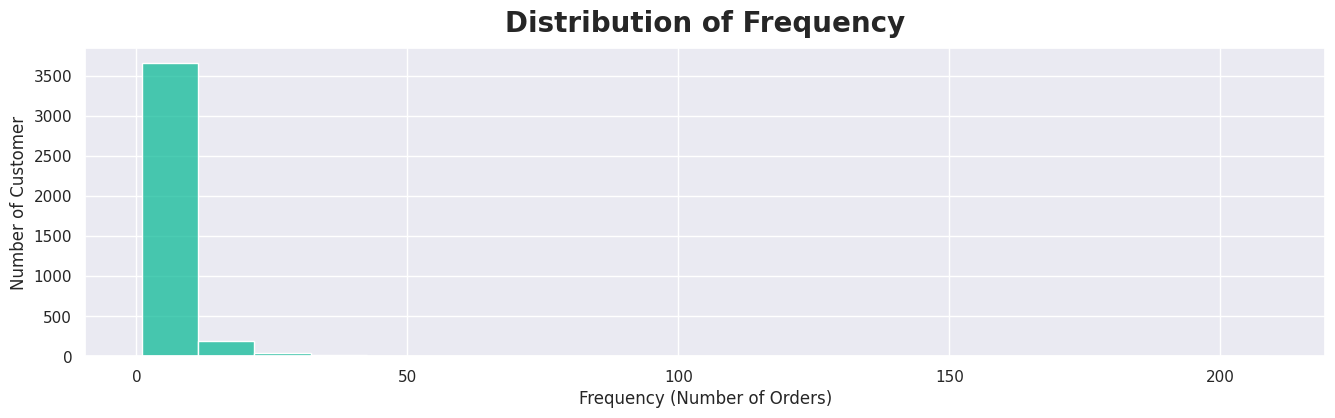

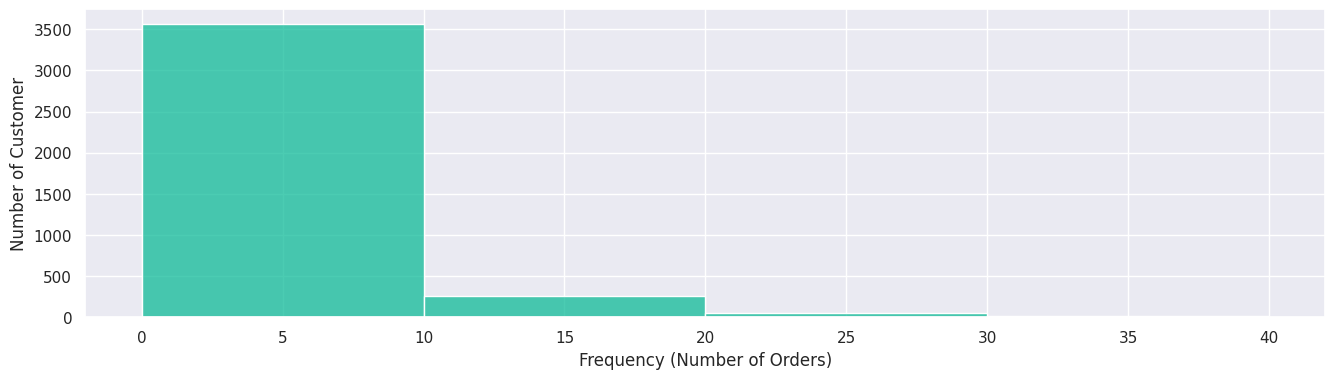

In [ ]:
plt.figure(figsize=(16, 4))
sns.histplot(RFM_calc_2['Frequency'], bins=20, color='#0fbb98')
plt.title('Distribution of Frequency', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Number of Customer')
plt.show()

plt.figure(figsize=(16, 4))
bin_ranges_F = [0, 10, 20, 30, 40]
sns.histplot(RFM_calc_2['Frequency'], bins=bin_ranges_F, color='#0fbb98')
plt.title('', pad=10)
plt.xlabel('Frequency (Number of Orders)')
plt.ylabel('Number of Customer')
plt.show()

**Interpretation:**
- The distribution of Frequency is highly right-skewed. As the Frequency increases, there is a significant drop in the number of customers.
- This 2nd historam indicates that most of customers have fewer than 20 transactions. For particular, more than 3,500 customers have made 1 to 10 purchases, when only few hundreds of customers have placed more than 10 orders and barely any have placed 20 or more.
> The majority of Superstore's customers are low-frequency purchasers who do not make purchases often.

### 1.3. Monetary

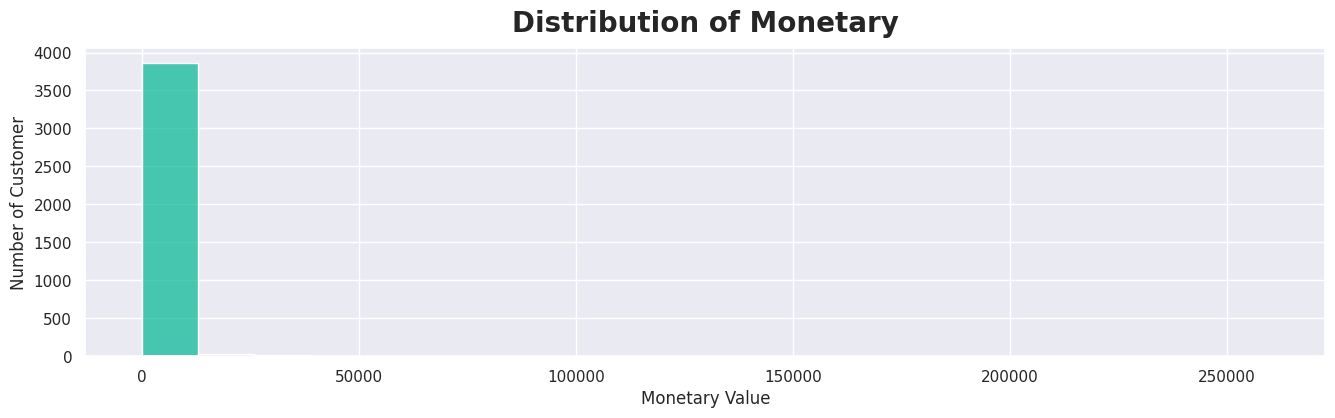

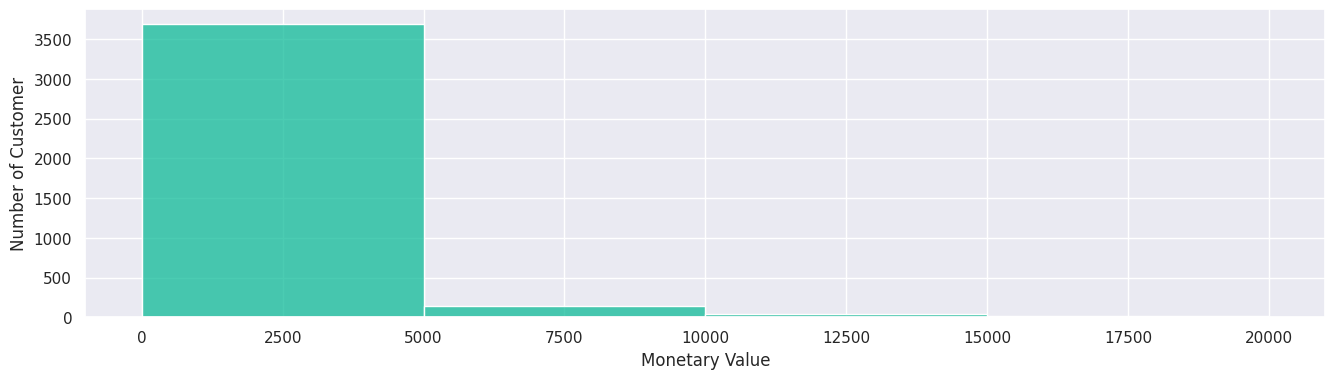

In [ ]:
plt.figure(figsize=(16, 4))
sns.histplot(RFM_calc_2['Monetary'], bins=20, color='#0fbb98')
plt.title('Distribution of Monetary', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('Monetary Value')
plt.ylabel('Number of Customer')
plt.show()

plt.figure(figsize=(16, 4))
bin_ranges_M = [0, 5000, 10000, 15000, 20000]
sns.histplot(RFM_calc_2['Monetary'], bins=bin_ranges_M, color='#0fbb98')
plt.title('', pad=10)
plt.xlabel('Monetary Value')
plt.ylabel('Number of Customer')
plt.show()

**Interpretation:**
- The distribution of Monetary is highly right-skewed. As the Monetary increases, there is a significant drop in the number of customers.
- This 2nd historam indicates that most of customers have fewer than 10,000 monetary values. For particular, more than 3,500 customers have spent less than 5,000, when only hundreds of customers have spent more than 5,000. Virtually none have spent more than 10,000.
> Most of Superstore customers have low spending, while a small portion of customers contributes to the high monetary value segment.

## 2. Customer Segment Distribution by Number of Customer & Total Sales

### 2.1. Customer Segmentation By Total Sales

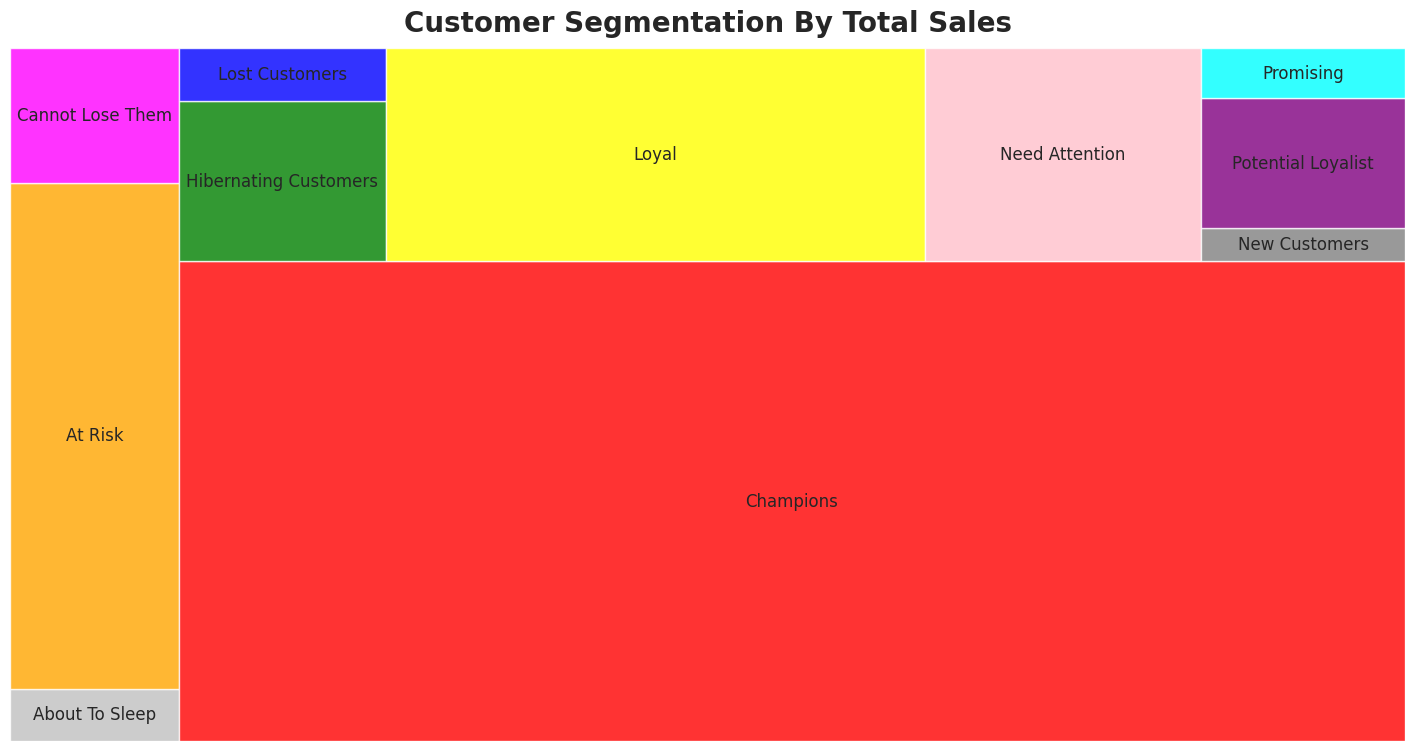

In [ ]:
plt.figure(figsize=(18, 9))
sizes = RFM_calc_2.groupby('CustomerSegment')['Monetary'].sum()
squarify.plot(sizes=sizes, label=sizes.index, alpha=.8, color=['silver', 'orange', 'magenta', 'red', 'green', 'blue', 'yellow', 'pink', 'gray', 'purple', 'cyan'])
plt.axis('off')
plt.title('Customer Segmentation By Total Sales',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.show()

**Interpretation:**
Ranking the customer segmentation by total sales:
1. Champions
2. Loyal
3. At Risk
4. Need Attention
5. Hibernating Customers
6. Potential Loyalist
7. Cannot Lose Them
8. Lost Customers
9. Promising
10. About To Sleep
11. New Customers

### 2.2. Customer Segmentation by Number of Customer

#### 2.2.1. Customer Segmentation by Customer Volume

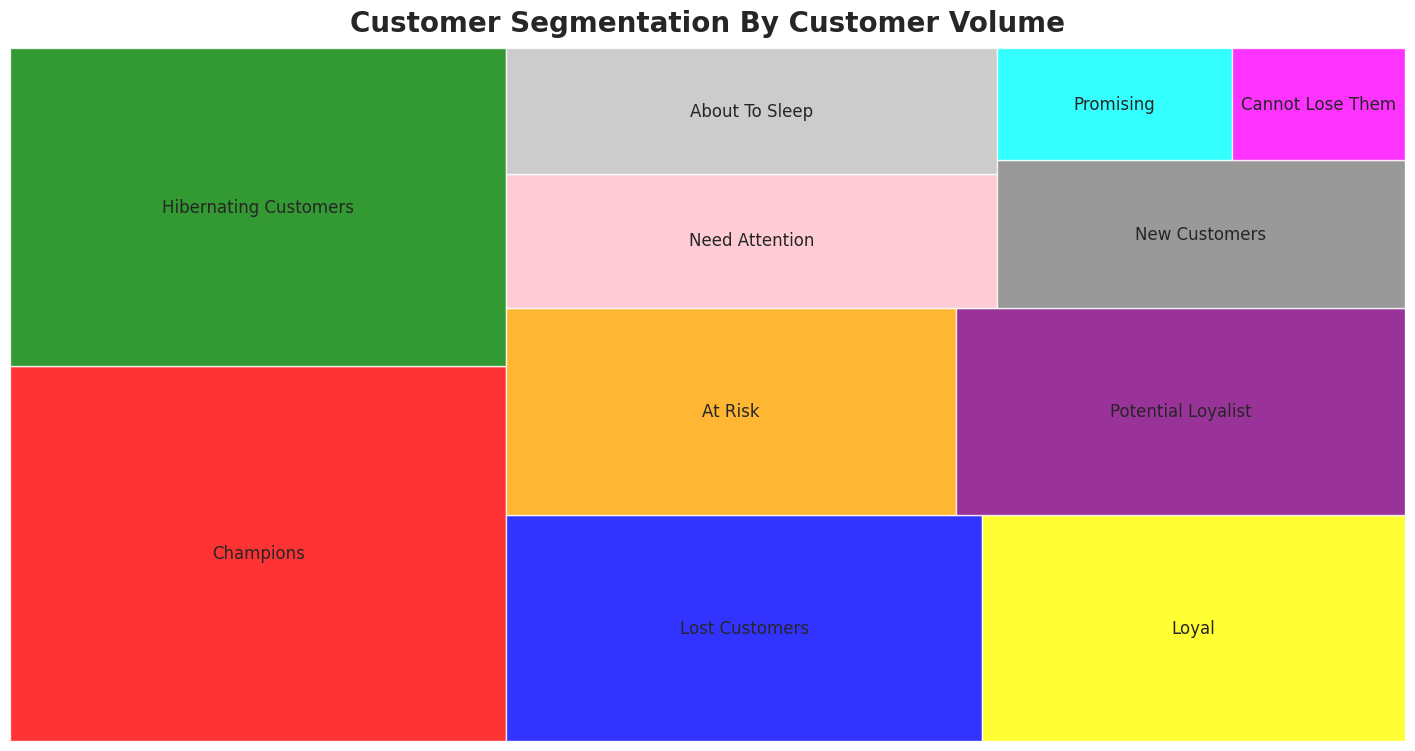

In [ ]:
plt.figure(figsize=(18, 9))
squarify.plot(sizes=RFM_calc_2['CustomerSegment'].value_counts(), label=RFM_calc_2['CustomerSegment'].value_counts().index, alpha=.8, color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'silver', 'gray', 'cyan', 'magenta'])
plt.axis('off')
plt.title('Customer Segmentation By Customer Volume',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.show()

**Interpretation:**
Ranking the customer segmentation by customer volume:
1. Champions
2. Hibernating Customers
3. Lost Customers
4. Loyal
5. Potential Loyalist
6. At Risk
7. Need Attention
8. About To Sleep
9. New Customers
10. Promising
11. Cannot Lose Them

#### 2.2.2. Distribution of Customer Across Segment

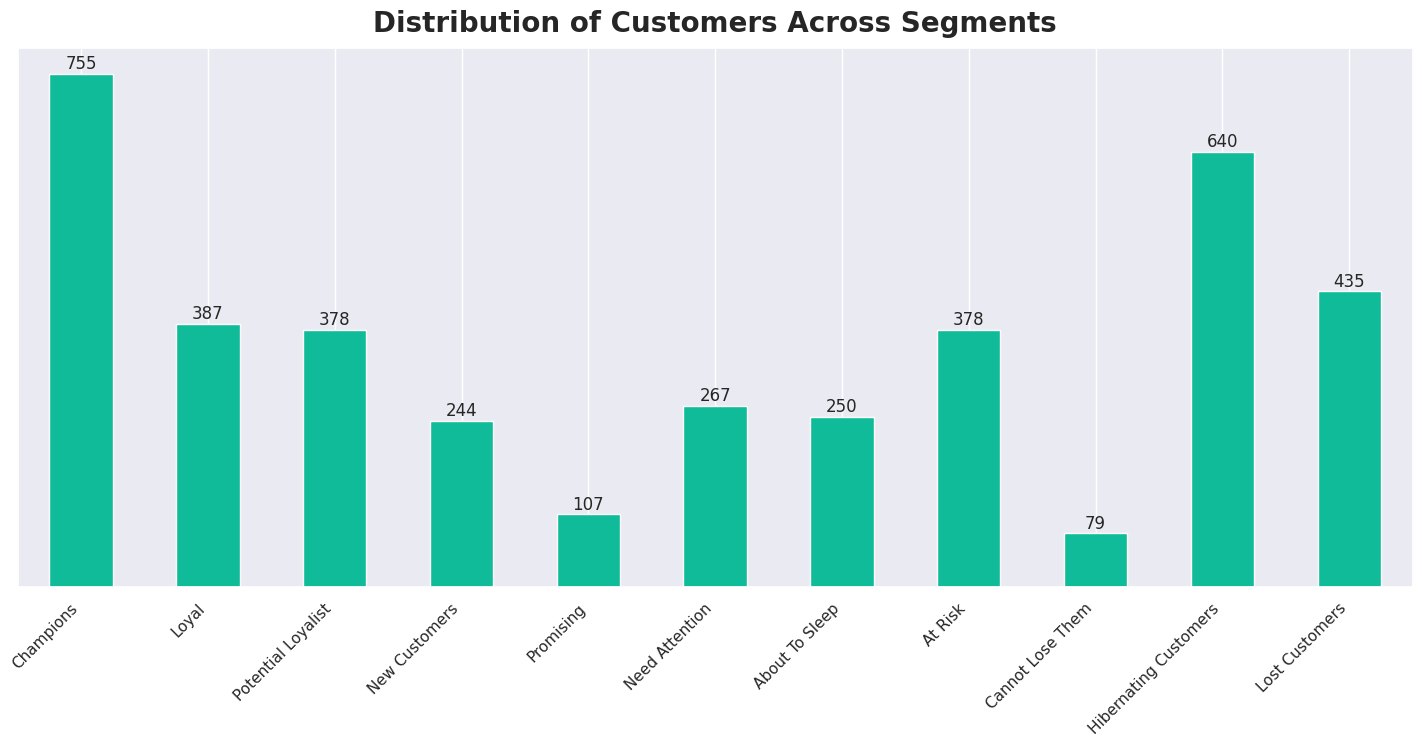

In [ ]:
custom_order = ['Champions', 'Loyal', 'Potential Loyalist', 'New Customers', 'Promising', 'Need Attention', 'About To Sleep', 'At Risk', 'Cannot Lose Them', 'Hibernating Customers', 'Lost Customers']
RFM_calc_2['CustomerSegment'] = pd.Categorical(RFM_calc_2['CustomerSegment'], categories=custom_order, ordered=True)
plt.figure(figsize=(18, 7))
RFM_calc_2['CustomerSegment'].value_counts().sort_index().plot(kind='bar', color='#0fbb98')
for i, value in enumerate(RFM_calc_2['CustomerSegment'].value_counts().sort_index()):
    plt.text(i, value + 2, str(value), ha='center', va='bottom')
plt.title('Distribution of Customers Across Segments',  fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=12)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.show()

In [ ]:
HVC = RFM_calc_2['CustomerSegment'].value_counts()[['Champions', 'Loyal', 'Potential Loyalist', 'New Customers', 'Promising']].sum()
ARC = RFM_calc_2['CustomerSegment'].value_counts()[['Need Attention', 'About To Sleep', 'At Risk', 'Cannot Lose Them']].sum()
LVC = RFM_calc_2['CustomerSegment'].value_counts()[['Hibernating Customers', 'Lost Customers']].sum()
print(f"High-Value Customers: {HVC}")
print(f"At-Risk Customers: {ARC}")
print(f"Low-Value Customers: {LVC}")

High-Value Customers: 1871
At-Risk Customers: 974
Low-Value Customers: 1075


**Interpretation:**
1. Categorizing the customer segments into 3 groups:
- High-Value Customers (HVC): Champions, Loyal, Potential Loyalist, New Customers, Promising.
- At-Risk Customers (ARC): Need Attention. About To Sleep, At Risk, Cannot Lose Them.
- Low-Value Customers (LVC): Hibernating Customers, Lost Customers.
2. Observation:
- HVC category contributes the most, with 1871 customers.
- LVC category contributes the second - 1075 customers, even with only 2 segments included.
- ARC category, while the smallest, still contributes a considerable amount of 974 customers.



#**V. Insight**

Link Insight: https://docs.google.com/spreadsheets/d/1MBt3b48lT-RzD44xsbMsgwtVO-JmIJjU/edit?usp=sharing&ouid=107825711284033293753&rtpof=true&sd=true